In [1]:
# Import all packages

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
import seaborn
from sklearn.decomposition import PCA

In [2]:
# Import csv file

df = pd.read_csv(r"C:\Users\bower\OneDrive\Desktop\medical_raw_data.csv", index_col=[0])

In [3]:
# Print out the DataFrame

print(df)

       CaseOrder Customer_id                           Interaction  \
1              1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2              2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3              3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4              4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5              5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...         ...                                   ...   
9996        9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9997        9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9998        9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9999        9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                    UID          City State        County  \
1      3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan   
2    

In [4]:
# Show datatypes

df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis              object
Diabetes  

In [5]:
# Show the DataFrame

df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3


In [6]:
# Show DataFrame duplicates

df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [7]:
#Show count of duplicates in DataFrame

print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [8]:
# There are no duplicates, this drop is just for show. Would delete duplicate records if there were any

df.drop_duplicates()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3


In [9]:
# Count of each column's null records

df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [10]:
# Show Children median

df[['Children']].median()

Children    1.0
dtype: float64

In [11]:
# Show Age median

df[['Age']].median()

Age    53.0
dtype: float64

In [12]:
# Show Income median

df[['Income']].median()

Income    33942.28
dtype: float64

In [13]:
# Show Initial_days median

df[['Initial_days']].median()

Initial_days    34.446941
dtype: float64

In [14]:
# Show Soft_drink mode

df[['Soft_drink']].mode()

,Soft_drink
0,No


In [15]:
df[['Overweight']].mode()

,Overweight
0,1.0


In [16]:
df[['Anxiety']].mode()

,Anxiety
0,0.0


In [17]:
# Show initial describe values

df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


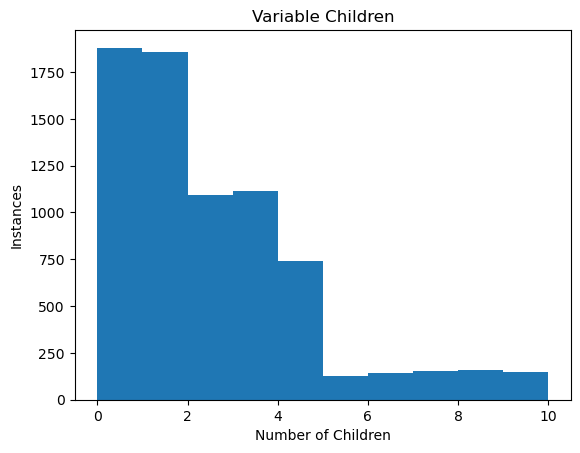

In [18]:
# Plot histogram for all quantitative variables with null values

# Plot histrogram for Children before imputation

plt.hist(df['Children'])
plt.xlabel('Number of Children')
plt.ylabel('Instances')
plt.title('Variable Children')


plt.show()


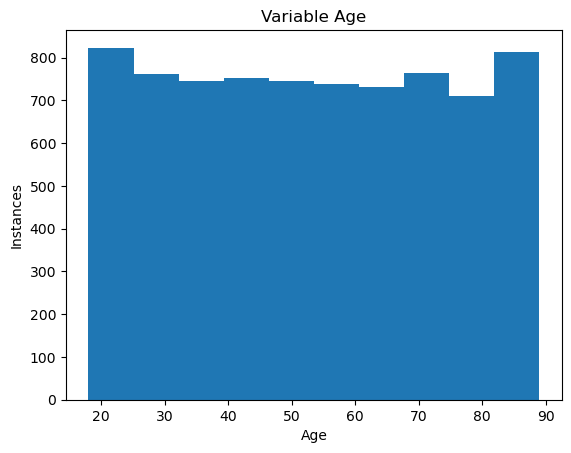

In [19]:
# Plot histogram for Age before imputation

plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Instances')
plt.title('Variable Age')

plt.show()

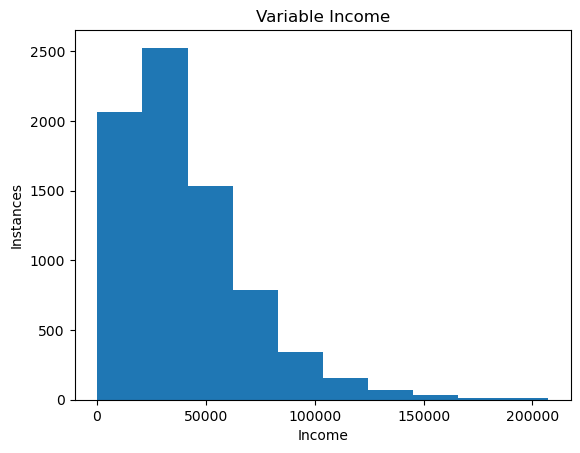

In [20]:
# Plot histogram for Income before imputation

plt.hist(df['Income'])
plt.xlabel('Income')
plt.ylabel('Instances')
plt.title('Variable Income')

plt.show()

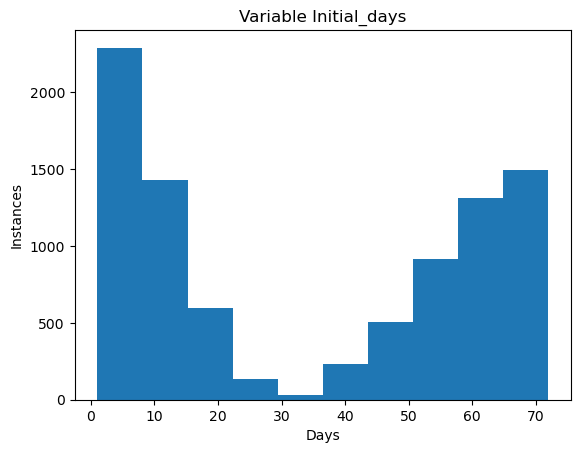

In [21]:
# Plot histogram for Initial_days before imputation

plt.hist(df['Initial_days'])
plt.xlabel('Days')
plt.ylabel('Instances')
plt.title('Variable Initial_days')

plt.show()

In [22]:
# Replace nan with 2 for Soft_drink, Overweight, Anxiety

df['Soft_drink'] = df['Soft_drink'].replace(np.nan, 0)

In [23]:
df['Overweight'] = df['Overweight'].replace(np.nan, 0)

In [24]:
df['Anxiety'] = df['Anxiety'].replace(np.nan, 0)

In [25]:
# Fill missing values with respected mean/median/mode 

# Children (Right skewed - median)
df['Children'].fillna(df['Children'].median(), inplace = True)

# Age (Normal - mean)
df['Age'].fillna(df['Age'].mean(), inplace = True)

# Income (Right skewed - median)
df['Income'].fillna(df['Income'].median(), inplace = True)

# Initial_days (bi-modal - median)
df['Initial_days'].fillna(df['Initial_days'].median(), inplace = True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 10000 non-null  float64
 16  Education

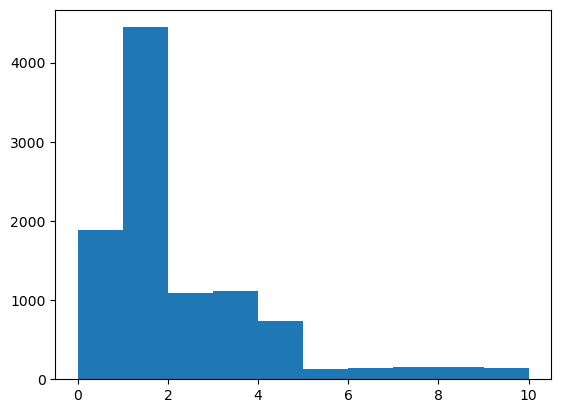

In [27]:
# Show histogram of variables with updated values

# Children updated histrogram

plt.hist(df['Children'])
plt.show()

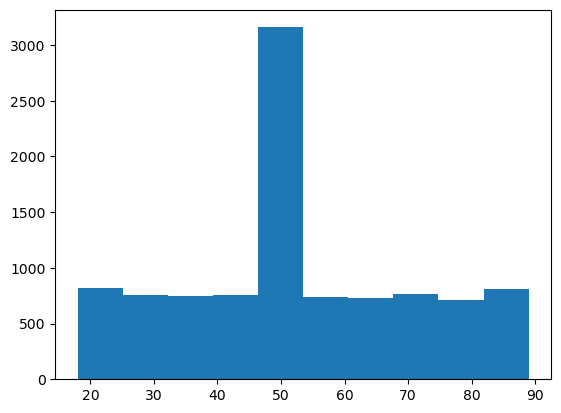

In [28]:
# Age updated histogram

plt.hist(df['Age'])
plt.show()

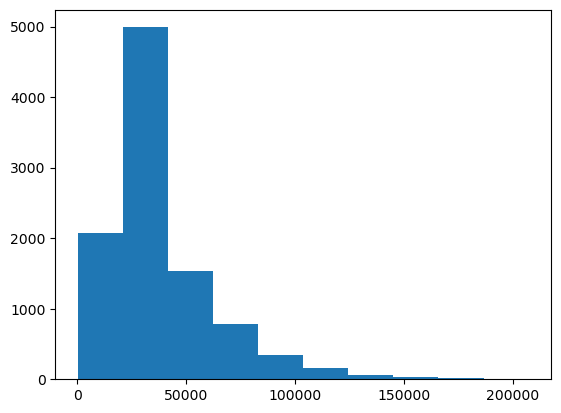

In [29]:
# Income updated histogram

plt.hist(df['Income'])
plt.show()

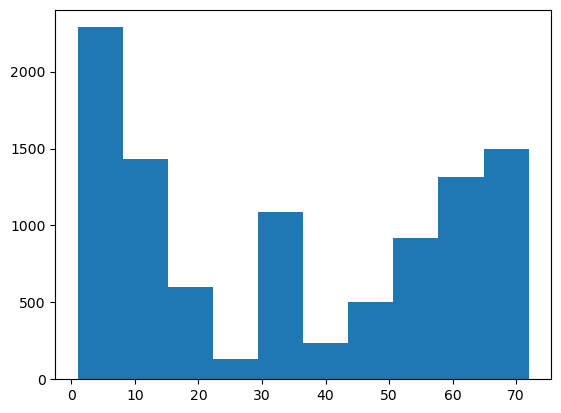

In [30]:
# Plot updated Initial_days histogram

plt.hist(df['Initial_days'])
plt.show()

In [31]:
# Show describe values after imputation

df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,1.814000,53.295676,38872.450471,19.412675,5.012200,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,1.916969,17.993375,25042.796229,6.723277,1.045734,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,1.000000,41.000000,23956.162500,16.513171,4.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.295676,33942.280000,18.080560,5.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,65.000000,46466.797500,19.789740,6.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [32]:
# Show Initial_days median after imputation

df[['Initial_days']].median()

Initial_days    34.446941
dtype: float64

In [33]:
# Children Z_Score

df['Z_Score_Children']=stats.zscore(df['Children'])

In [34]:
df[['Children','Z_Score_Children']].head

<bound method NDFrame.head of        Children  Z_Score_Children
1           1.0         -0.424650
2           3.0          0.618716
3           3.0          0.618716
4           0.0         -0.946333
5           1.0         -0.424650
...         ...               ...
9996        1.0         -0.424650
9997        4.0          1.140399
9998        3.0          0.618716
9999        3.0          0.618716
10000       8.0          3.227130

[10000 rows x 2 columns]>

In [35]:
# Age Z Score

df['Z_Score_Children']=stats.zscore(df['Children'])

In [36]:
df[['Children','Z_Score_Children']].head

<bound method NDFrame.head of        Children  Z_Score_Children
1           1.0         -0.424650
2           3.0          0.618716
3           3.0          0.618716
4           0.0         -0.946333
5           1.0         -0.424650
...         ...               ...
9996        1.0         -0.424650
9997        4.0          1.140399
9998        3.0          0.618716
9999        3.0          0.618716
10000       8.0          3.227130

[10000 rows x 2 columns]>

In [37]:
# Income Z Score

df['Z_Score_Income']=stats.zscore(df['Income'])

In [38]:
df[['Children','Z_Score_Income']].head

<bound method NDFrame.head of        Children  Z_Score_Income
1           1.0        1.904974
2           3.0        0.316815
3           3.0       -0.978466
4           0.0        0.034704
5           1.0       -1.504016
...         ...             ...
9996        1.0        0.283336
9997        4.0       -0.953992
9998        3.0        1.080020
9999        3.0       -0.366197
10000       8.0        0.950827

[10000 rows x 2 columns]>

In [39]:
#Initial_days Z score

df['Z_Score_Initial_days']=stats.zscore(df['Initial_days'])

In [40]:
df[['Initial_days','Z_Score_Initial_days']].head

<bound method NDFrame.head of        Initial_days  Z_Score_Initial_days
1         10.585770             -0.959326
2         15.129562             -0.776544
3          4.772177             -1.193189
4          1.714879             -1.316175
5          1.254807             -1.334682
...             ...                   ...
9996      51.561217              0.688989
9997      68.668237              1.377151
9998      34.446941              0.000535
9999      63.356903              1.163493
10000     70.850592              1.464941

[10000 rows x 2 columns]>

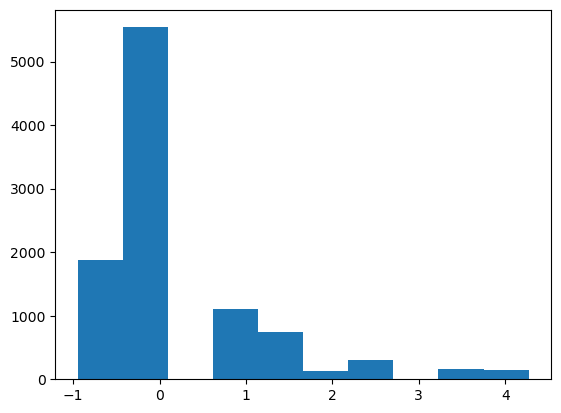

In [41]:
# Show Histogram of z score children outliers

plt.hist(df['Z_Score_Children'])
plt.show()

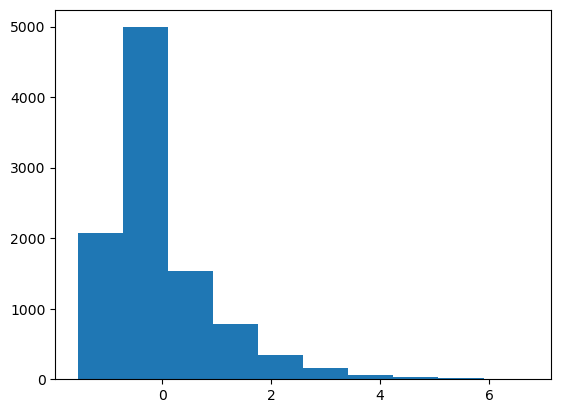

In [42]:
# Show Histogram of z score income outliers

plt.hist(df['Z_Score_Income'])
plt.show()

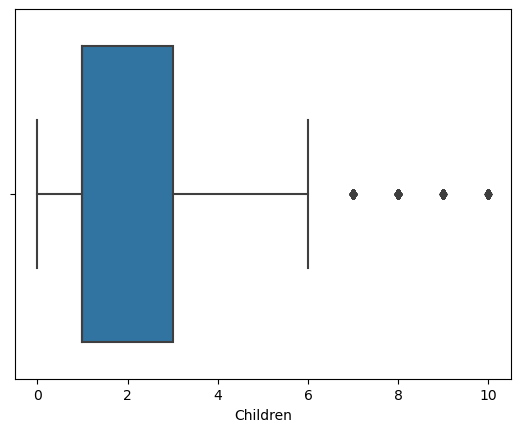

In [43]:
# Show box plot of Z score of Children

boxplot=seaborn.boxplot(x='Children',data=df)

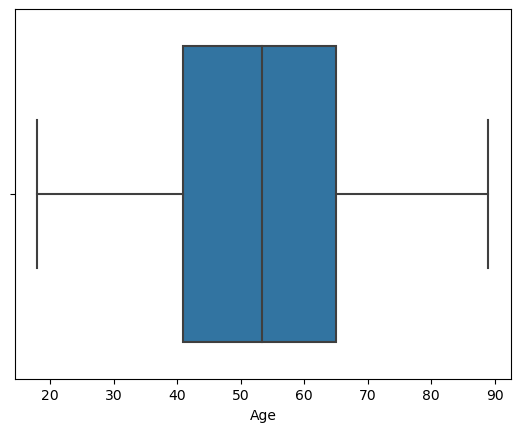

In [44]:
# Show box plot of Z score of Age

boxplot=seaborn.boxplot(x='Age',data=df)

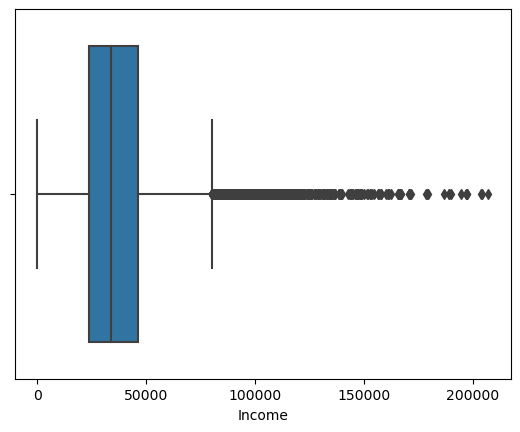

In [45]:
# Show box plot of Z score of Income - Income is a natural variation in humans so some outliers less than 75000 will be kept

boxplot=seaborn.boxplot(x='Income',data=df)

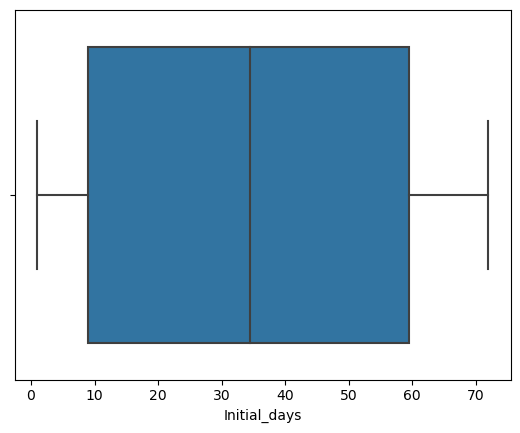

In [46]:
# Show box plot of Z score of Initial_days

boxplot=seaborn.boxplot(x='Initial_days',data=df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                   10

In [48]:

# Drop outliers in Income

df['Income'] = np.where(df['Income'] > 75000, np.nan, df['Income'])

In [49]:
# Drop outliers in Children

df['Children'] = np.where(df['Children'] >= 6, np.nan, df['Children'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              9398 non-null   float64
 15  Age                   10

In [51]:
# Impute the median for Income outliers

df['Income'].fillna(df['Income'].median(), inplace=True)

In [52]:
# Impute the median for Children outliers

df['Children'].fillna(df['Children'].median(), inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                   10

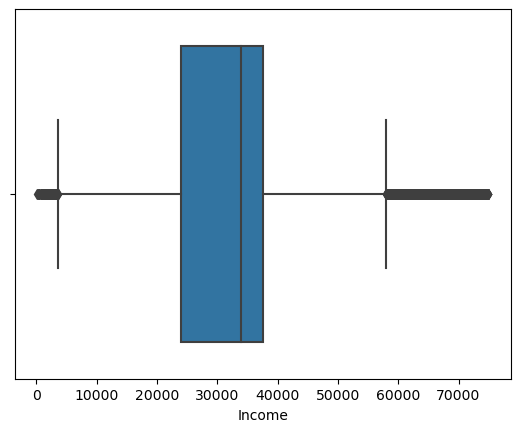

In [54]:
# Boxplot of Income after removing values greater than 75000

boxplot=seaborn.boxplot(x='Income',data=df)

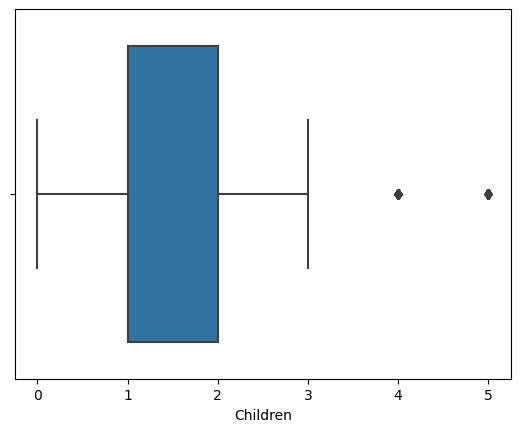

In [55]:
# Boxplot of Children after removing values greater than or equal to 6

boxplot=seaborn.boxplot(x='Children',data=df)

In [56]:
# Find number of outliers for Income

Income_query = df.query('Income > 58000')

In [57]:
Income_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 19 to 10000
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             766 non-null    int64  
 1   Customer_id           766 non-null    object 
 2   Interaction           766 non-null    object 
 3   UID                   766 non-null    object 
 4   City                  766 non-null    object 
 5   State                 766 non-null    object 
 6   County                766 non-null    object 
 7   Zip                   766 non-null    int64  
 8   Lat                   766 non-null    float64
 9   Lng                   766 non-null    float64
 10  Population            766 non-null    int64  
 11  Area                  766 non-null    object 
 12  Timezone              766 non-null    object 
 13  Job                   766 non-null    object 
 14  Children              766 non-null    float64
 15  Age                   766

In [58]:
# Find number of outliers for Children

Children_query = df.query('Children > 3')

In [59]:
Children_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 11 to 9997
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             865 non-null    int64  
 1   Customer_id           865 non-null    object 
 2   Interaction           865 non-null    object 
 3   UID                   865 non-null    object 
 4   City                  865 non-null    object 
 5   State                 865 non-null    object 
 6   County                865 non-null    object 
 7   Zip                   865 non-null    int64  
 8   Lat                   865 non-null    float64
 9   Lng                   865 non-null    float64
 10  Population            865 non-null    int64  
 11  Area                  865 non-null    object 
 12  Timezone              865 non-null    object 
 13  Job                   865 non-null    object 
 14  Children              865 non-null    float64
 15  Age                   865 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                   10

In [61]:
# Ordinal encoding for Arthritis

df.Arthritis.unique()

array(['Yes', 'No'], dtype=object)

In [62]:
df['Arthritis_numeric'] = df['Arthritis']

In [63]:
dict_arthritis = {"Arthritis_numeric":{"No":0, "Yes":1}}

In [64]:
df.replace(dict_arthritis, inplace=True)

In [65]:
# Ordinal encoding for Diabetes

df.Diabetes.unique()

array(['Yes', 'No'], dtype=object)

In [66]:
df['Diabetes_numeric'] = df['Diabetes']

In [67]:
dict_diabetes = {"Diabetes_numeric":{"No":0, "Yes":1}}

In [68]:
df.replace(dict_diabetes, inplace=True)

In [69]:
# Ordinal encoding for Hyperlipidemia

df.Hyperlipidemia.unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']

In [71]:
dict_hyperlipidemia = {"Hyperlipidemia_numeric":{"No":0, "Yes":1}}

In [72]:
df.replace(dict_hyperlipidemia, inplace=True)

In [73]:
# Ordinal encoding for BackPain

df.BackPain.unique()

array(['Yes', 'No'], dtype=object)

In [74]:
df['BackPain_numeric'] = df['BackPain']

In [75]:
dict_backpain = {"BackPain_numeric":{"No":0, "Yes":1}}

In [76]:
df.replace(dict_backpain, inplace=True)

In [77]:
# Ordinal encoding for Allergic_rhinitis

df.Allergic_rhinitis.unique()

array(['Yes', 'No'], dtype=object)

In [78]:
df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']

In [79]:
dict_Allergic_rhinitis = {"Allergic_rhinitis_numeric":{"No":0, "Yes":1}}

In [80]:
df.replace(dict_Allergic_rhinitis, inplace=True)

In [81]:
# Ordinal encoding for Reflux_esophagitis

df.Reflux_esophagitis.unique()

array(['No', 'Yes'], dtype=object)

In [82]:
df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']

In [83]:
dict_Reflux_esophagitis = {"Reflux_esophagitis_numeric":{"No":0, "Yes":1}}

In [84]:
df.replace(dict_Reflux_esophagitis, inplace=True)

In [85]:
# Ordinal encoding for Asthma

df.Asthma.unique()

array(['Yes', 'No'], dtype=object)

In [86]:
df['Asthma_numeric'] = df['Asthma']

In [87]:
dict_Asthma = {"Asthma_numeric":{"No":0, "Yes":1}}

In [88]:
df.replace(dict_Asthma, inplace=True)

In [89]:
df.Soft_drink.unique()

array([0, 'No', 'Yes'], dtype=object)

In [90]:
df['Soft_drink_numeric'] = df['Soft_drink']

In [91]:
dict_Soft_drink = {"Soft_drink_numeric":{"No":0, "Yes":1}}

In [92]:
df.replace(dict_Soft_drink, inplace=True)

In [93]:
# Rounding Age

df['Age'] = np.rint(df.Age).astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   10000 non-null  int64  
 1   Customer_id                 10000 non-null  object 
 2   Interaction                 10000 non-null  object 
 3   UID                         10000 non-null  object 
 4   City                        10000 non-null  object 
 5   State                       10000 non-null  object 
 6   County                      10000 non-null  object 
 7   Zip                         10000 non-null  int64  
 8   Lat                         10000 non-null  float64
 9   Lng                         10000 non-null  float64
 10  Population                  10000 non-null  int64  
 11  Area                        10000 non-null  object 
 12  Timezone                    10000 non-null  object 
 13  Job                         10000 no

In [95]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Z_Score_Income,Z_Score_Initial_days,Arthritis_numeric,Diabetes_numeric,Hyperlipidemia_numeric,BackPain_numeric,Allergic_rhinitis_numeric,Reflux_esophagitis_numeric,Asthma_numeric,Soft_drink_numeric
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,1.904974,-0.959326,1,1,0,1,1,0,1,0
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,0.316815,-0.776544,0,0,0,0,0,1,0,0
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,-0.978466,-1.193189,0,1,0,0,0,0,0,0
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,0.034704,-1.316175,1,0,0,0,0,1,1,0
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,-1.504016,-1.334682,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,0.283336,0.688989,0,0,0,0,0,1,0,0
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,-0.953992,1.377151,1,1,0,0,0,0,1,0
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,1.080020,0.000535,0,0,0,0,1,0,0,1
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,...,-0.366197,1.163493,0,0,0,1,0,0,0,0


In [96]:
df.to_csv("D206_csv_submission_final.csv")

In [97]:
# Variables for PCA: Population, Income, VitD_levels, initial_days, TotalCharge, Additional_charges
# Creating a variable for the PCA values

pca_data = df [['Population', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [98]:
# Normalize using Mean Normalization

pca_data_normalized = (pca_data-pca_data.mean())/pca_data.std()

In [99]:
# Shaping the data

pca = PCA(n_components=pca_data.shape[1])

In [100]:
# Fit the data

pca.fit(pca_data_normalized)

PCA(n_components=6)

In [101]:
# Transform the pca into a DataFrame

pca_data_pca = pd.DataFrame(pca.transform(pca_data_normalized))
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [102]:
# Match columns and create index

loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
index=pca_data.columns)

In [103]:
# Show loadings

loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Population,0.021913,-0.476342,0.536130,0.467200,0.516628,-0.001460
Income,0.003322,0.278130,0.764748,-0.581079,-0.011831,-0.000208
VitD_levels,0.544139,0.402823,-0.132610,0.011487,0.477098,0.544340
Initial_days,0.450285,-0.502739,0.130198,-0.055336,-0.566431,0.451265
TotalCharge,0.706957,0.001436,-0.013839,-0.013141,-0.004416,-0.706983
Additional_charges,0.029599,0.529836,0.304953,0.663856,-0.429500,0.015048


In [104]:
# Create covariance

cov_matrix = np.dot(pca_data_normalized.T, pca_data_normalized) / pca_data.shape[0]

In [105]:
# Eigenvalues

eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

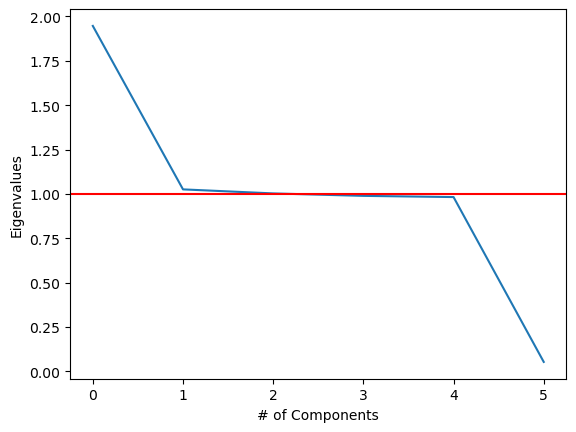

In [106]:
# Make Scree Plot using eigenvalues

plt.plot(eigenvalues)
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color="red")

In [107]:
# Keep all PCs that have an eigenvalue of 1 or greater than 1 (Kaiser rule)

print(eigenvalues[0])
print(eigenvalues[1])
print(eigenvalues[2])
print(eigenvalues[3])

# Keep PC1(Population), PC2(Income), PC3(VitD_levels)

1.946154650981248
1.0254898644048238
1.0028072726566966
0.9889782204874089


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   10000 non-null  int64  
 1   Customer_id                 10000 non-null  object 
 2   Interaction                 10000 non-null  object 
 3   UID                         10000 non-null  object 
 4   City                        10000 non-null  object 
 5   State                       10000 non-null  object 
 6   County                      10000 non-null  object 
 7   Zip                         10000 non-null  int64  
 8   Lat                         10000 non-null  float64
 9   Lng                         10000 non-null  float64
 10  Population                  10000 non-null  int64  
 11  Area                        10000 non-null  object 
 12  Timezone                    10000 non-null  object 
 13  Job                         10000 no